Première phase de découverte du dataset + cleaning et choix des colonnes utiles

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
full_data = pd.read_csv("../Dataset/Speed Dating Data.csv", encoding="ISO-8859-1")
full_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [5]:
import re
columns = []
with open("../Dataset/variables.txt", "r") as f_open:
    for line in f_open:
        if re.search(r"([a-zA-Z_]+):", line) is not None:
            element = re.search(r"([a-zA-Z_]+):", line).group(1)
            columns += [element]
print(columns)
c = '''
tvsports  
exercise  
dining  
museums  
art  
hiking  
gaming  
clubbing  
reading  
tv  
theater  
movies  
concerts  
music  
shopping  
yoga
'''
l = [el.strip() for el in c.split('\n')]
print(l)

['gender', 'age', 'age_o', 'd_age', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sinsere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'decision', 'decision_o', 'match']
['', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',

In [6]:
pd.DataFrame(full_data.isnull().sum(), columns= ['nan_count'])
#full_data.isnull().sum()

,nan_count
iid,0
id,1
gender,0
idg,0
condtn,0
wave,0
round,0
position,0
positin1,1846
order,0


In [7]:
# Séléction colonnes
dataset = full_data[['iid', 'pid', 'partner','gender', 'age', 'age_o', 'race', 'race_o', 'attr_o', 'samerace', 'imprace', 'imprelig', 'match', 'int_corr', 'field', 'field_cd', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']]
dataset.columns

Index(['iid', 'pid', 'partner', 'gender', 'age', 'age_o', 'race', 'race_o',
       'attr_o', 'samerace', 'imprace', 'imprelig', 'match', 'int_corr',
       'field', 'field_cd', 'from', 'zipcode', 'income', 'goal', 'date',
       'go_out', 'career', 'career_c', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1',
       'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met'],
      dtype='object')

In [8]:
dataset.isnull().sum()

iid            0
pid           10
partner        0
gender         0
age           95
age_o        104
race          63
race_o        73
attr_o       212
samerace       0
imprace       79
imprelig      79
match          0
int_corr     158
field         63
field_cd      82
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
expnum      6578
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr2_1       79
sinc2_1       79
intel2_1      79
fun2_1        79
amb2_1        89
shar2_1       89
attr3_1      105
sinc3_1      105
intel3_1     105
fun3_1       105
amb3_1       1

In [9]:
dataset = dataset.drop(['income', 'expnum'], axis=1)
dataset.isnull().sum()

iid            0
pid           10
partner        0
gender         0
age           95
age_o        104
race          63
race_o        73
attr_o       212
samerace       0
imprace       79
imprelig      79
match          0
int_corr     158
field         63
field_cd      82
from          79
zipcode     1064
goal          79
date          97
go_out        79
career        89
career_c     138
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr2_1       79
sinc2_1       79
intel2_1      79
fun2_1        79
amb2_1        89
shar2_1       89
attr3_1      105
sinc3_1      105
intel3_1     105
fun3_1       105
amb3_1       105
attr         202
sinc         2

In [10]:
dataset = dataset.drop(['zipcode', 'field', 'from', 'career'], axis=1)
dataset.isnull().sum()

iid            0
pid           10
partner        0
gender         0
age           95
age_o        104
race          63
race_o        73
attr_o       212
samerace       0
imprace       79
imprelig      79
match          0
int_corr     158
field_cd      82
goal          79
date          97
go_out        79
career_c     138
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr2_1       79
sinc2_1       79
intel2_1      79
fun2_1        79
amb2_1        89
shar2_1       89
attr3_1      105
sinc3_1      105
intel3_1     105
fun3_1       105
amb3_1       105
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        10

In [11]:
corr = dataset.corr()
max_corr = [max(abs(a[a!=1])) for a in corr.values]
data_corr = dataset.iloc[:,[a>0.5 for a in max_corr]]
corr_high = data_corr.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_high, annot=True)
plt.show()hobbies_data_1['pid'] = hobbies_data_1['pid'].astype(int)

SyntaxError: invalid syntax (<ipython-input-11-a8be247b8e7b>, line 7)

In [ ]:
corr_match = corr.match[abs(corr.match)>0.1]
corr_match

In [ ]:
pie_data = [x for x in corr_match.values if x != 1]
pie_lab = [x for x in corr_match.index if x != "match"]
plt.figure(figsize=(10,10))
plt.pie(pie_data, labels=pie_lab, autopct="%1.1f%%")
plt.show()

In [ ]:
# data to plot
hobbies = ['tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
n_groups = len(hobbies)

data_men = dataset[dataset.gender == 1]
bar_data_men = np.array(data_men[['tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].mean())

data_girl = dataset[dataset.gender == 0]
bar_data_girl = np.array(data_girl[['tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].mean())

# create plot
plt.figure(figsize=(17, 7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, bar_data_men, bar_width,
alpha=opacity,
color='skyblue',
label='Men')

bar2 = plt.bar(index + bar_width, bar_data_girl, bar_width,
alpha=opacity,
color='pink',
label='Girl')

plt.xlabel('Hobbies')
plt.ylabel('Scores')
plt.title('Scores in hobbies by gender')
plt.xticks(index + bar_width/2, hobbies)
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
atributes_gender = dataset[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols
atributes_gender

In [ ]:
# create plot
plt.figure(figsize=(10, 5))
index = np.arange(len(cols))
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, atributes_gender.iloc[1], bar_width,
alpha=opacity,
color='blue',
label='Men')

bar2 = plt.bar(index + bar_width, atributes_gender.iloc[0], bar_width,
alpha=opacity,
color='pink',
label='Girl')

plt.ylabel('Scores')
plt.title('What you look for in the opposite sex')
plt.xticks(index + bar_width/2, atributes_gender.columns)
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
scorecard = full_data[['match','attr', 'sinc','intel','fun','amb','shar', 'like', 'prob', 'met']].groupby('match').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests', 'Like', 'Probability', 'Met']
scorecard.columns = cols
scorecard.iloc[0]

In [ ]:
# create plot
plt.figure(figsize=(10, 5))
index = np.arange(len(cols))
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, scorecard.iloc[1], bar_width,
alpha=opacity,
color='c',
label='Match')

bar2 = plt.bar(index + bar_width, scorecard.iloc[0], bar_width,
alpha=opacity,
color='r',
label='Not Match')

plt.ylabel('Scores')
plt.title('Relation between atributes of partner and match or not')
plt.xticks(index + bar_width/2, scorecard.columns)
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
hobbies_data_1 = full_data[['iid', 'pid', 'match', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']]

hobbies_data_2 = full_data[['iid', 'pid', 'match', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']]

hobbies_data_2.columns = ['iid_p', 'pid_p', 'match_p', 'tvsports_p', 'exercise_p', 'dining_p', 'museums_p', 'art_p', 'hiking_p', 'gaming_p', 'clubbing_p', 'reading_p', 'tv_p', 'theater_p', 'movies_p', 'concerts_p', 'music_p', 'shopping_p', 'yoga_p']

hobbies_data_1 = hobbies_data_1[hobbies_data_1.pid.notna()]
hobbies_data_2 = hobbies_data_2[hobbies_data_2.pid_p.notna()]

hobbies_data_1['pid'] = hobbies_data_1['pid'].astype(int)
hobbies_data_2['pid_p'] = hobbies_data_2['pid_p'].astype(int)

hobbies_data_1['unique'] = hobbies_data_1['iid'].astype(str) + '-' + hobbies_data_1['pid'].astype(str)
hobbies_data_2['unique_p'] = hobbies_data_2['pid_p'].astype(str) + '-' + hobbies_data_2['iid_p'].astype(str)

hobbies_data = hobbies_data_1.merge(hobbies_data_2, left_on='unique', right_on='unique_p', how='inner')

hobbies_data['tvsports_d'] = abs(hobbies_data['tvsports'] - hobbies_data['tvsports_p'])
hobbies_data['exercise_d'] = abs(hobbies_data['exercise'] - hobbies_data['exercise_p'])
hobbies_data['dining_d'] = abs(hobbies_data['dining'] - hobbies_data['dining_p'])
hobbies_data['museums_d'] = abs(hobbies_data['museums'] - hobbies_data['museums_p'])
hobbies_data['art_d'] = abs(hobbies_data['art'] - hobbies_data['art_p'])
hobbies_data['hiking_d'] = abs(hobbies_data['hiking'] - hobbies_data['hiking_p'])
hobbies_data['gaming_d'] = abs(hobbies_data['gaming'] - hobbies_data['gaming_p'])
hobbies_data['reading_d'] = abs(hobbies_data['reading'] - hobbies_data['reading_p'])
hobbies_data['clubbing_d'] = abs(hobbies_data['clubbing'] - hobbies_data['clubbing_p'])
hobbies_data['tv_d'] = abs(hobbies_data['tv'] - hobbies_data['tv_p'])
hobbies_data['theater_d'] = abs(hobbies_data['theater'] - hobbies_data['theater_p'])
hobbies_data['movies_d'] = abs(hobbies_data['movies'] - hobbies_data['movies_p'])
hobbies_data['concerts_d'] = abs(hobbies_data['concerts'] - hobbies_data['concerts_p'])
hobbies_data['music_d'] = abs(hobbies_data['music'] - hobbies_data['music_p'])
hobbies_data['shopping_d'] = abs(hobbies_data['shopping'] - hobbies_data['shopping_p'])
hobbies_data['yoga_d'] = abs(hobbies_data['yoga'] - hobbies_data['yoga_p'])

hobbies_data['Diff_Interests'] = hobbies_data['tvsports_d'] +hobbies_data['exercise_d'] +hobbies_data['dining_d'] +hobbies_data['museums_d'] +hobbies_data['art_d'] +hobbies_data['hiking_d'] +hobbies_data['gaming_d'] +hobbies_data['reading_d'] +hobbies_data['clubbing_d'] +hobbies_data['tv_d'] +hobbies_data['theater_d'] +hobbies_data['movies_d'] +hobbies_data['concerts_d'] +hobbies_data['music_d'] +hobbies_data['shopping_d'] +hobbies_data['yoga_d'] 

hobbies_data.head()

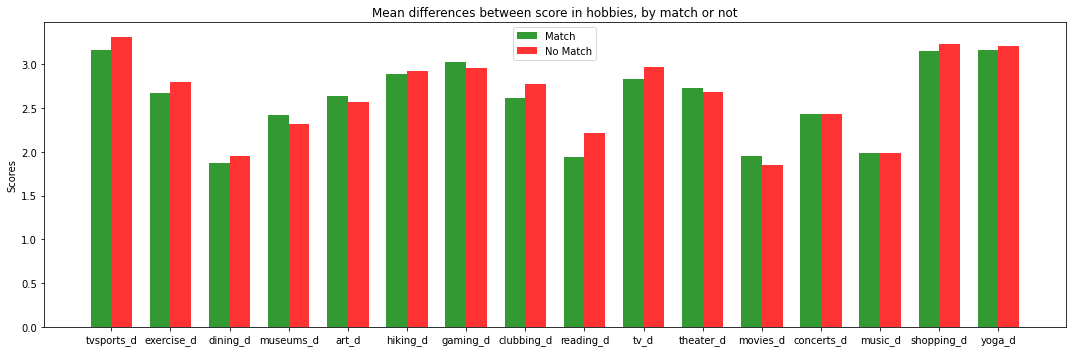

In [91]:
hobbies_data_match = hobbies_data[hobbies_data["match"] == 1]
hobbies_data_no_match = hobbies_data[hobbies_data["match"] == 0]

hobbies_data_match_chart = hobbies_data_match[['tvsports_d', 'exercise_d', 'dining_d', 'museums_d', 'art_d', 'hiking_d', 'gaming_d', 'clubbing_d', 'reading_d', 'tv_d', 'theater_d', 'movies_d', 'concerts_d', 'music_d', 'shopping_d', 'yoga_d']].mean()
hobbies_data_no_match_chart = hobbies_data_no_match[['tvsports_d', 'exercise_d', 'dining_d', 'museums_d', 'art_d', 'hiking_d', 'gaming_d', 'clubbing_d', 'reading_d', 'tv_d', 'theater_d', 'movies_d', 'concerts_d', 'music_d', 'shopping_d', 'yoga_d']].mean()

plt.figure(figsize=(15, 5))
index = np.arange(len(hobbies_data_match_chart))
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, hobbies_data_match_chart.values, bar_width,
alpha=opacity,
color='g',
label='Match')

bar2 = plt.bar(index + bar_width, hobbies_data_no_match_chart.values, bar_width,
alpha=opacity,
color='r',
label='No Match')

plt.ylabel('Scores')
plt.title('Mean differences between score in hobbies, by match or not')
plt.xticks(index + bar_width/2, hobbies_data_match_chart.index)
plt.legend()


plt.tight_layout()
plt.show()

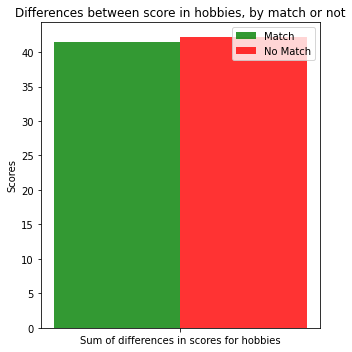

In [90]:
hobbies_data_match_chart = hobbies_data_match.Diff_Interests.mean()
hobbies_data_no_match_chart = hobbies_data_no_match.Diff_Interests.mean()

plt.figure(figsize=(5, 5))
index = np.arange(1)
bar_width = 35
opacity = 0.8

bar1 = plt.bar(index, hobbies_data_match_chart, bar_width,
alpha=opacity,
color='g',
label='Match')

bar2 = plt.bar(index + bar_width, hobbies_data_no_match_chart, bar_width,
alpha=opacity,
color='r',
label='No Match')

plt.ylabel('Scores')
plt.title('Differences between score in hobbies, by match or not')
plt.xticks(index + bar_width/2, ['Sum of differences in scores for hobbies'])
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
atributes_data_1 = full_data[['iid', 'pid', 'match', 'gender', 'attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1', 'attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1', 'attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1', 'attr5_1', 'sinc5_1','intel5_1','fun5_1','amb5_1', 'attr1_2', 'sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2', 'attr3_2', 'sinc3_2','intel3_2','fun3_2','amb3_2']]

atributes_data_2 = full_data[['iid', 'pid', 'match', 'gender', 'attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1', 'attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1', 'attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1', 'attr5_1', 'sinc5_1','intel5_1','fun5_1','amb5_1', 'attr1_2', 'sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2', 'attr3_2', 'sinc3_2','intel3_2','fun3_2','amb3_2']]

atributes_data_1 = atributes_data_1[atributes_data_1.pid.notna()]
atributes_data_2 = atributes_data_2[atributes_data_2.pid.notna()]

atributes_data_1['pid'] = atributes_data_1['pid'].astype(int)
atributes_data_2['pid'] = atributes_data_2['pid'].astype(int)

atributes_data_1['unique'] = atributes_data_1['iid'].astype(str) + '-' + atributes_data_1['pid'].astype(str)
atributes_data_2['unique'] = atributes_data_2['pid'].astype(str) + '-' + atributes_data_2['iid'].astype(str)

atributes_data = atributes_data_1.merge(atributes_data_2, left_on='unique', right_on='unique', how='inner')

atributes_data.head()

In [ ]:
atributes_data.isnull().sum()

In [ ]:
atributes_data.columns

In [ ]:
atributes_data.shape

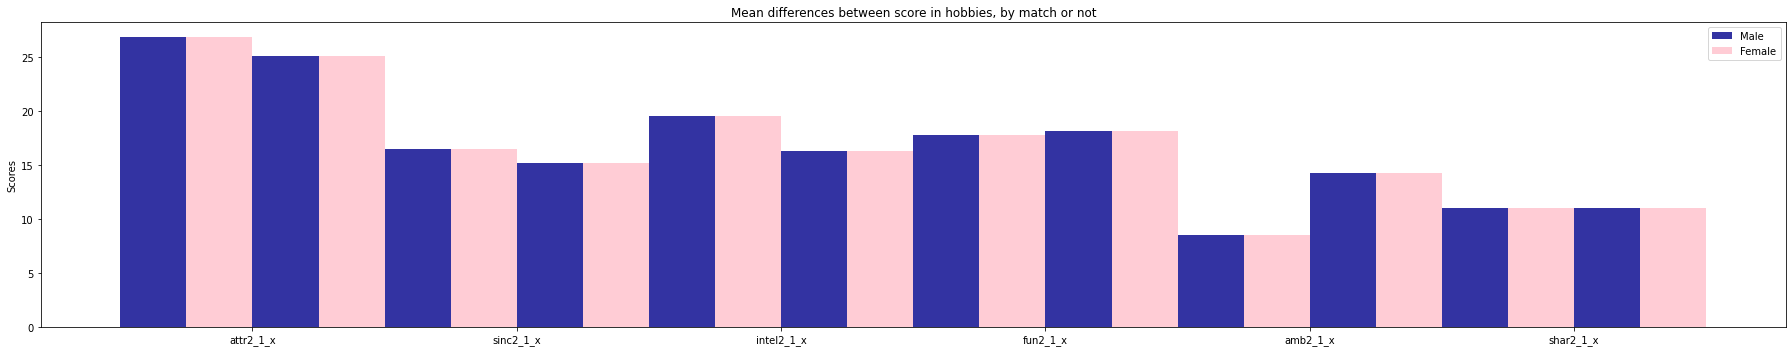

In [89]:
men = atributes_data[atributes_data["gender_x"] == 1]
girl = atributes_data[atributes_data["gender_x"] == 0]

i_look_for = men[['attr1_1_x', 'sinc1_1_x', 'intel1_1_x', 'fun1_1_x', 'amb1_1_x', 'shar1_1_x']].mean()
partner_look_for = girl[['attr1_1_y', 'sinc1_1_y', 'intel1_1_y', 'fun1_1_y', 'amb1_1_y', 'shar1_1_y']].mean()

i_think = men[['attr2_1_x', 'sinc2_1_x', 'intel2_1_x', 'fun2_1_x', 'amb2_1_x', 'shar2_1_x']].mean()
partner_think = girl[['attr2_1_y', 'sinc2_1_y', 'intel2_1_y', 'fun2_1_y', 'amb2_1_y', 'shar2_1_y']].mean()

plt.figure(figsize=(25, 5))
index = np.arange(len(i_think))
bar_width = 0.25
opacity = 0.8

bar1 = plt.bar(index, i_look_for.values, bar_width,
alpha=opacity,
color='darkblue',
label='Male')

bar2 = plt.bar(index + bar_width, partner_look_for.values, bar_width,
alpha=opacity,
color='pink',
label='Female')

bar3 = plt.bar(index + bar_width*2, i_think.values, bar_width,
alpha=opacity,
color='darkblue')

bar4 = plt.bar(index + bar_width*3, partner_think.values, bar_width,
alpha=opacity,
color='pink')
plt.ylabel('Scores')
plt.title('Mean differences between score in hobbies, by match or not')
plt.xticks(index + bar_width*1.5, i_think.index)
plt.legend()


plt.tight_layout()
plt.show()

In [29]:
atributes_data["diff_match"] = abs(atributes_data['attr1_1_x']-atributes_data['attr1_1_y']) + abs(atributes_data['sinc1_1_x']-atributes_data['sinc1_1_y']) + abs(atributes_data['intel1_1_x']-atributes_data['intel1_1_y']) + abs(atributes_data['fun1_1_x']-atributes_data['fun1_1_y']) + abs(atributes_data['amb1_1_x']-atributes_data['amb1_1_y']) + abs(atributes_data['shar1_1_x']-atributes_data['shar1_1_y'])

match_diff = atributes_data[atributes_data["match_x"] == 1].diff_match.mean()
no_match_diff = atributes_data[atributes_data["match_x"] == 0].diff_match.mean()

print(match_diff, no_match_diff)







47.44747761194029 46.15657437407953


In [38]:
heart_breack = full_data.query("dec == 1 & dec_o == 0")
hd = heart_breack[["career_c", "iid"]]
chart_data = hd.groupby("career_c").count()
chart_data

,iid
career_c,
1.0,175
2.0,641
3.0,63
4.0,90
5.0,74
6.0,188
7.0,579
8.0,8
9.0,112


In [46]:
heart_love = full_data.query("dec == 1 & dec_o == 1")
hl = heart_love[["career_c", "iid"]]
chart_data_2 = hl.groupby("career_c").count()
np.array(chart_data_2.iid)

array([134, 360,  54,  70,  36, 115, 390,   5,  79,  48,  35,   1,   6,
         3,  13,   8,   1])

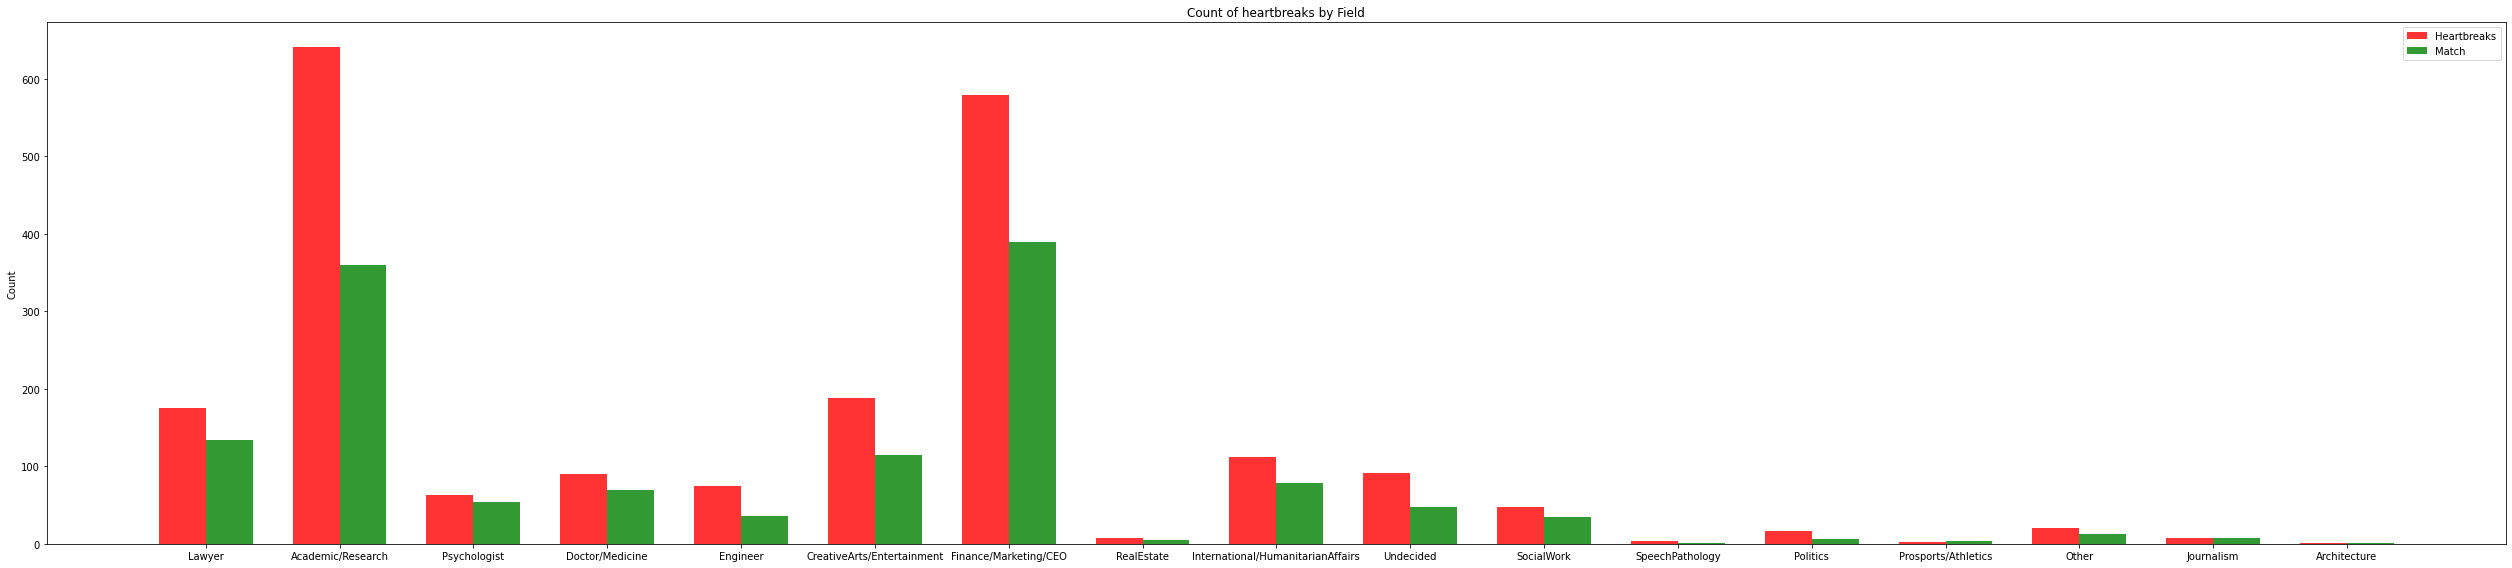

In [72]:
plt.figure(figsize=(35, 8))
index = np.arange(len(np.array(chart_data_2.iid)))
bar_width = 0.35
opacity = 0.8

bar1 = plt.bar(index, np.array(chart_data.iid), bar_width,
alpha=opacity,
color='red',
label='Heartbreaks')

bar2 = plt.bar(index + bar_width, np.array(chart_data_2.iid), bar_width,
alpha=opacity,
color='green',
label='Match')

plt.ylabel('Count')
plt.title('Count of heartbreaks by Field')
plt.xticks(index + bar_width/2, ['Lawyer', 'Academic/Research', 'Psychologist', 'Doctor/Medicine', 'Engineer', 'CreativeArts/Entertainment', 'Finance/Marketing/CEO', 'RealEstate', 'International/HumanitarianAffairs', 'Undecided', 'SocialWork', 'SpeechPathology', 'Politics', 'Prosports/Athletics', 'Other', 'Journalism', 'Architecture'])
plt.legend()


plt.tight_layout()
plt.show()

In [64]:
heart_breack = full_data.query("dec == 1 & dec_o == 0")
hd = heart_breack[["date", "iid"]]
chart_data_3 = hd.groupby("date").count()
chart_data_3

,iid
date,
1.0,21
2.0,87
3.0,187
4.0,517
5.0,368
6.0,590
7.0,360


In [65]:
heart_breack = full_data.query("match == 1")
hd = heart_breack[["date", "iid"]]
chart_data_4 = hd.groupby("date").count()
chart_data_4

,iid
date,
1.0,29
2.0,65
3.0,159
4.0,365
5.0,237
6.0,297
7.0,212


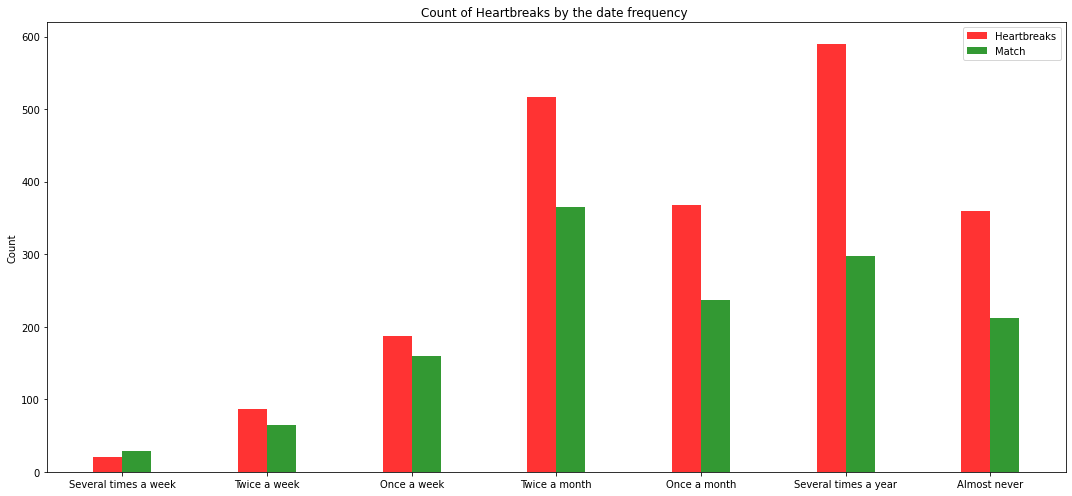

In [70]:
plt.figure(figsize=(15, 7))
index = np.arange(len(np.array(chart_data_4.iid)))
bar_width = 0.2
opacity = 0.8

bar1 = plt.bar(index, np.array(chart_data_3.iid), bar_width,
alpha=opacity,
color='red',
label='Heartbreaks')

bar2 = plt.bar(index + bar_width, np.array(chart_data_4.iid), bar_width,
alpha=opacity,
color='green',
label='Match')

plt.ylabel('Count')
plt.title('Count of Heartbreaks by the date frequency ')
plt.xticks(index + bar_width/2, ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year', 'Almost never'])
plt.legend()


plt.tight_layout()
plt.show()

In [75]:
heart_breack = full_data.query("dec == 1 & dec_o == 0")
hd = heart_breack[["goal", "iid"]]
chart_data_5 = hd.groupby("goal").count()
chart_data_5

heart_breack = full_data.query("dec == 1 & dec_o == 1")
hd = heart_breack[["goal", "iid"]]
chart_data_6 = hd.groupby("goal").count()
chart_data_6

,iid
goal,
1.0,583
2.0,484
3.0,100
4.0,51
5.0,85
6.0,62


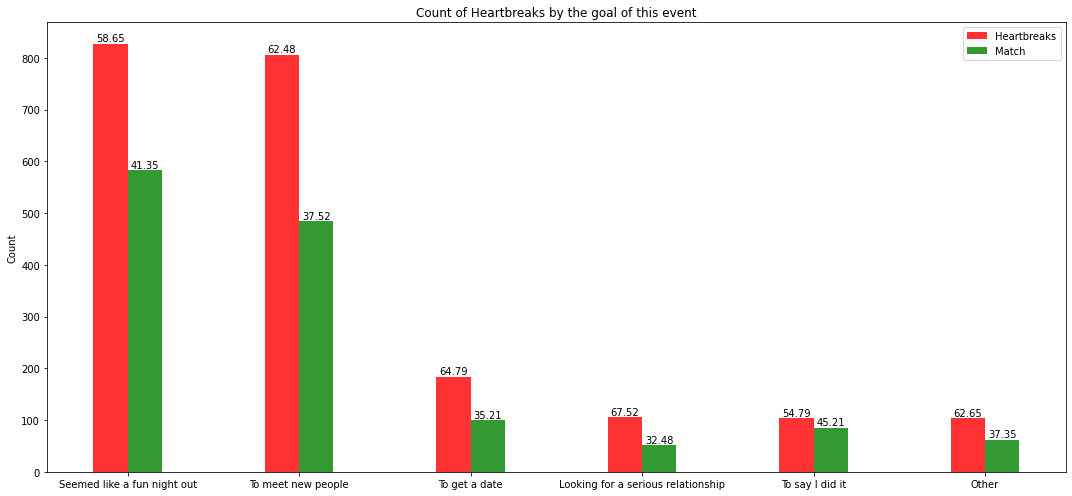

In [96]:
plt.figure(figsize=(15, 7))
index = np.arange(len(np.array(chart_data_5.iid)))
bar_width = 0.2
opacity = 0.8

bar1 = plt.bar(index, np.array(chart_data_5.iid), bar_width,
alpha=opacity,
color='red',
label='Heartbreaks')

bar2 = plt.bar(index + bar_width, np.array(chart_data_6.iid), bar_width,
alpha=opacity,
color='green',
label='Match')

plt.text(index[0], np.array(chart_data_5.iid)[0]+10, np.round(np.array(chart_data_5.iid)[0]/(np.array(chart_data_5.iid)[0]+np.array(chart_data_6.iid)[0]) * 100, 2), ha="center", va="center")
plt.text(index[0] + bar_width, np.array(chart_data_6.iid)[0]+10, np.round(np.array(chart_data_6.iid)[0]/(np.array(chart_data_5.iid)[0]+np.array(chart_data_6.iid)[0]) * 100, 2), ha="center", va="center")
plt.text(index[1], np.array(chart_data_5.iid)[1]+10, np.round(np.array(chart_data_5.iid)[1]/(np.array(chart_data_5.iid)[1]+np.array(chart_data_6.iid)[1]) * 100, 2), ha="center", va="center")
plt.text(index[1] + bar_width, np.array(chart_data_6.iid)[1]+10, np.round(np.array(chart_data_6.iid)[1]/(np.array(chart_data_5.iid)[1]+np.array(chart_data_6.iid)[1]) * 100, 2), ha="center", va="center")
plt.text(index[2], np.array(chart_data_5.iid)[2]+10, np.round(np.array(chart_data_5.iid)[2]/(np.array(chart_data_5.iid)[2]+np.array(chart_data_6.iid)[2]) * 100, 2), ha="center", va="center")
plt.text(index[2] + bar_width, np.array(chart_data_6.iid)[2]+10, np.round(np.array(chart_data_6.iid)[2]/(np.array(chart_data_5.iid)[2]+np.array(chart_data_6.iid)[2]) * 100, 2), ha="center", va="center")
plt.text(index[3], np.array(chart_data_5.iid)[3]+10, np.round(np.array(chart_data_5.iid)[3]/(np.array(chart_data_5.iid)[3]+np.array(chart_data_6.iid)[3]) * 100, 2), ha="center", va="center")
plt.text(index[3] + bar_width, np.array(chart_data_6.iid)[3]+10, np.round(np.array(chart_data_6.iid)[3]/(np.array(chart_data_5.iid)[3]+np.array(chart_data_6.iid)[3]) * 100, 2), ha="center", va="center")
plt.text(index[4], np.array(chart_data_5.iid)[4]+10, np.round(np.array(chart_data_5.iid)[4]/(np.array(chart_data_5.iid)[4]+np.array(chart_data_6.iid)[4]) * 100, 2), ha="center", va="center")
plt.text(index[4] + bar_width, np.array(chart_data_6.iid)[4]+10, np.round(np.array(chart_data_6.iid)[4]/(np.array(chart_data_5.iid)[4]+np.array(chart_data_6.iid)[4]) * 100, 2), ha="center", va="center")
plt.text(index[5], np.array(chart_data_5.iid)[5]+10, np.round(np.array(chart_data_5.iid)[5]/(np.array(chart_data_5.iid)[5]+np.array(chart_data_6.iid)[5]) * 100, 2), ha="center", va="center")
plt.text(index[5] + bar_width, np.array(chart_data_6.iid)[5]+10, np.round(np.array(chart_data_6.iid)[5]/(np.array(chart_data_5.iid)[5]+np.array(chart_data_6.iid)[5]) * 100, 2), ha="center", va="center")


plt.ylabel('Count')
plt.title('Count of Heartbreaks by the goal of this event')
plt.xticks(index + bar_width/2, ['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other'])
plt.legend()


plt.tight_layout()
plt.show()